# Abstract

This notebook compares the candidate mechanism perturbation amplitude at multiple disease stages in Alzheimer's Disease experiments, using the PyBEL web service

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
from pandas.plotting import andrews_curves, parallel_coordinates
from sklearn.cluster import KMeans
from sklearn import preprocessing
import time

In [2]:
#%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [3]:
np.random.seed(5)

In [4]:
time.asctime()

'Thu Aug 24 19:19:03 2017'

In [6]:
downloads = os.path.join(os.path.expanduser('~'), 'Downloads')

early = os.path.join(downloads, '1.csv')
moderate = os.path.join(downloads, '2.csv')
severe = os.path.join(downloads, '3.csv')

In [7]:
scaler = preprocessing.StandardScaler()

In [37]:
early_df = pd.read_csv(early).rename(index=str, columns={"avg": "EarlyAvg"})
moderate_df = pd.read_csv(moderate).rename(index=str, columns={"avg": "ModerateAvg"})
severe_df = pd.read_csv(severe).rename(index=str, columns={"avg": "SevereAvg"})

df = pd.concat(
    [
        early_df[['Namespace', 'Name', 'EarlyAvg']], 
        moderate_df['ModerateAvg'], 
        severe_df['SevereAvg']
    ], 
    axis=1
)

df = df[df['EarlyAvg'].notnull()]
df = df[df['EarlyAvg'] != 0]

cols = ['EarlyAvg', 'ModerateAvg', 'SevereAvg']

df.to_csv(os.path.join(os.path.expanduser('~'), 'Desktop', 'time_series_cmpa.csv'))
df.head()

,Namespace,Name,EarlyAvg,ModerateAvg,SevereAvg
1,GOBP,response to oxidative stress,5.296596,2.137034,-6.087801
3,GOBP,mitochondrial calcium ion homeostasis,-8.948465,0.931385,-0.045967
4,GOBP,electron transport chain,-8.948465,0.931385,-0.045967
5,GOBP,calcium ion homeostasis,2.978848,9.412645,6.796792
6,GOBP,microglial cell activation involved in immune ...,-0.017150,-3.813142,-2.315259


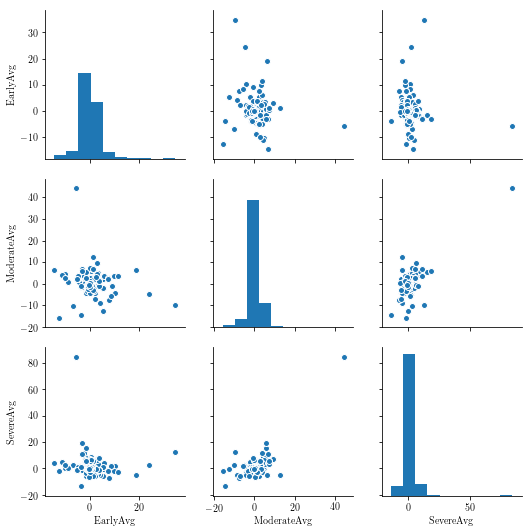

In [12]:
sns.pairplot(df[['EarlyAvg', 'ModerateAvg', 'SevereAvg']])
plt.show()

Use the pearson correlation over the time series

In [13]:
corr_df = df[cols].T.corr()

Clustering reveals 3 general patterns of biological processes throughout the progressions.

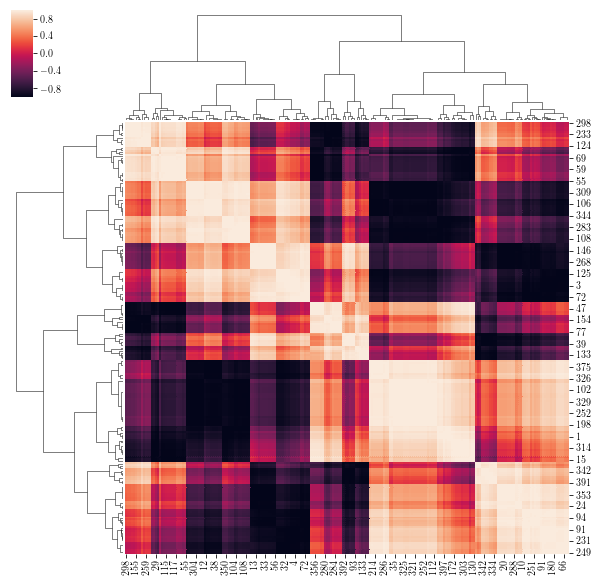

In [14]:
cg = sns.clustermap(corr_df)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.savefig(os.path.join(os.path.expanduser('~'), 'Desktop', 'time_series_clustering_ad.pdf'))
plt.show()

Assign classes based on a simple k-means clustering.

In [15]:
km = KMeans(n_clusters=5)
km.fit(df[cols])

df['label'] = km.labels_

Parallel coordinates immediately reveal the groups of patterns in relation of each mechanism to the disease progressions. Andrews curves use fourier analysis to reveal further patterns in the frequency domain.

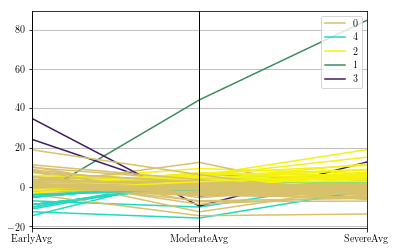

In [24]:
parallel_coordinates(df[['EarlyAvg', 'ModerateAvg', 'SevereAvg', 'label']], 'label')
plt.savefig(os.path.join(os.path.expanduser('~'), 'Desktop', 'time_series_pc.pdf'))

Retry the whole analysis but min/max normalize each column first

In [39]:
df_norm = df[cols].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

norm_corr_df = df_norm[cols].T.corr()

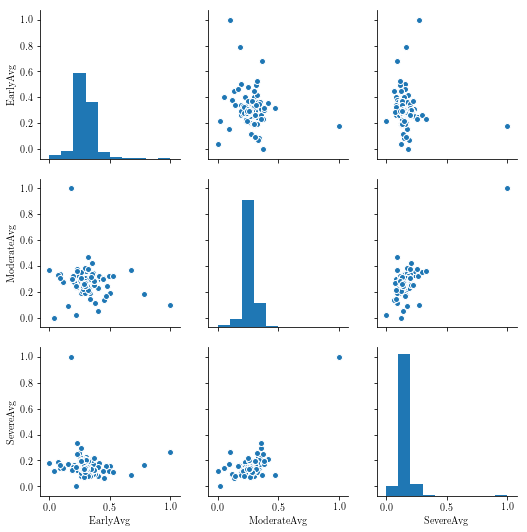

In [40]:
sns.pairplot(df_norm[['EarlyAvg', 'ModerateAvg', 'SevereAvg']])
plt.show()

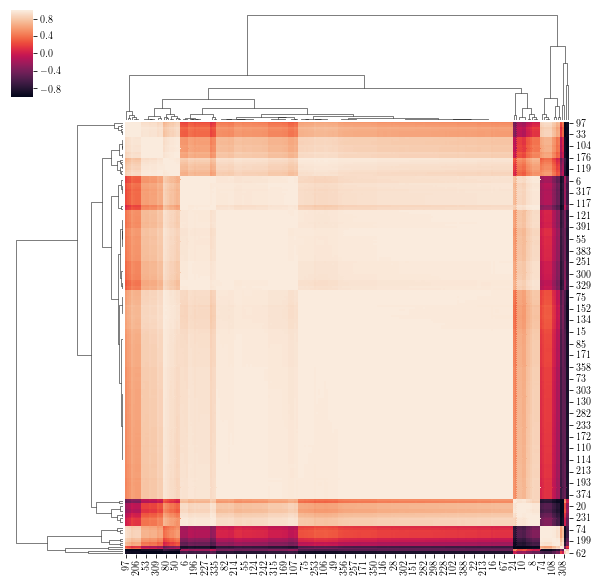

In [41]:
cg = sns.clustermap(norm_corr_df)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [43]:
km_norm = KMeans(n_clusters=6)
km_norm.fit(df[cols])

df_norm['label'] = km_norm.labels_

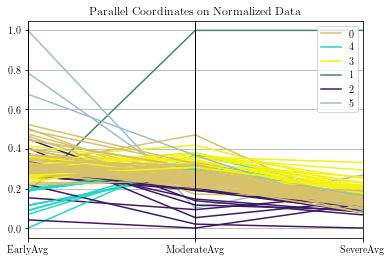

In [44]:
plt.title('Parallel Coordinates on Normalized Data')
parallel_coordinates(df_norm, 'label')
plt.show()

Class `0` contains candidate mechanisms whose CMPA scores are neither significant nor do they change much over time. The other class members are enumerated below.

In [31]:
df[df['label'] == 0]

,Namespace,Name,EarlyAvg,ModerateAvg,SevereAvg,label
1,GOBP,response to oxidative stress,5.296596,2.137034,-6.087801,0
6,GOBP,microglial cell activation involved in immune ...,-0.017150,-3.813142,-2.315259,0
8,GOBP,reactive oxygen species metabolic process,8.948465,-0.931385,0.045967,0
11,GOBP,apoptotic process,1.186899,12.517673,-5.053128,0
15,GOBP,response to endoplasmic reticulum stress,-0.730211,-0.553103,-5.064365,0
16,GOBP,response to unfolded protein,1.567032,0.929631,-0.787240,0
17,GOBP,endoplasmic reticulum calcium ion homeostasis,1.761505,2.375824,1.026676,0
19,GOBP,regulation of N-methyl-D-aspartate selective g...,0.510623,-0.240828,0.999108,0
20,MESHPP,Lipid Peroxidation,10.356926,-4.345640,1.938144,0
22,GOBP,cholesterol homeostasis,0.536060,0.432731,1.045690,0


In [30]:
df[df['label'] == 1]

,Namespace,Name,EarlyAvg,ModerateAvg,SevereAvg,label
7,GOBP,inflammatory response,-5.778051,44.296752,84.732124,1


In [27]:
df[df['label'] == 2]

,Namespace,Name,EarlyAvg,ModerateAvg,SevereAvg,label
5,GOBP,calcium ion homeostasis,2.978848,9.412645,6.796792,2
41,GOBP,Notch signaling pathway,-1.822177,4.178887,8.694139,2
50,GOBP,ERK1 and ERK2 cascade,-1.608855,1.221230,4.855417,2
53,GOBP,calcium ion import,0.580309,5.731350,8.970168,2
59,GOBP,zinc ion homeostasis,0.478904,-0.439513,6.279291,2
63,GOBP,generation of neurons,1.217343,7.036821,5.770116,2
69,GOBP,glucose metabolic process,0.050223,-0.601791,7.270026,2
72,GOBP,regulation of synaptic plasticity,0.660108,7.027913,5.833035,2
74,GOBP,long term synaptic depression,-2.524297,3.609185,11.765401,2
104,GOBP,regulation of neuronal synaptic plasticity,-1.849193,1.816492,5.736933,2


In [28]:
df[df['label'] == 3]

,Namespace,Name,EarlyAvg,ModerateAvg,SevereAvg,label
10,GOBP,cell death,24.246755,-4.557207,2.389045,3
24,GOBP,neuron death,34.887666,-9.675451,12.695044,3


In [29]:
df[df['label'] == 4]

,Namespace,Name,EarlyAvg,ModerateAvg,SevereAvg,label
3,GOBP,mitochondrial calcium ion homeostasis,-8.948465,0.931385,-0.045967,4
4,GOBP,electron transport chain,-8.948465,0.931385,-0.045967,4
9,GOBP,neuron apoptotic process,-7.032991,-10.172057,2.915282,4
12,GOBP,memory,-4.496774,0.816029,2.182167,4
13,GOBP,"regulation of synaptic transmission, cholinergic",-5.047467,1.985854,-1.348633,4
18,GOBP,regulation of ryanodine-sensitive calcium-rele...,-3.740118,-1.692425,1.193665,4
23,GOBP,cognition,-10.332842,4.522832,0.413625,4
31,GOBP,mitochondria-nucleus signaling pathway,-14.620588,6.509005,3.778627,4
32,GOBP,mitochondrion organization,-11.202153,4.001664,4.477320,4
33,GOBP,mitochondrial transport,-5.178463,2.172820,-0.969072,4


# Conclusions

Patients can be measured at multiple time points to be temporally aligned based on these patterns and possibly identify a disease subtype.